<a href="https://colab.research.google.com/github/TanyaKumari0204/Machine-Learning-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresiion is used since we want to predict exact price of houses not just binary answers.Here labels or target are the price of houses.

House Price Data -> data preprocessing -> data analysis(finding useful features)->train test split->XGBoostRegressor(decision tree type) ->Evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing house price data

In [7]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

In [9]:
print(house_price_dataset)#target has prices or price of house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [11]:
#Loading the datasets to a pandas dataframe
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)#columns =columns name

In [12]:
house_price_dataframe.head()

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]

In [13]:
#add the target col or price col to dataframe
house_price_dataframe['price']=house_price_dataset.target

In [14]:
house_price_dataframe.head()

MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  price
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]

In [16]:
#checking the number of rows and col of dataframe
house_price_dataframe.shape

(20640, 9)

In [18]:
#check if dataframe has missing values or not
house_price_dataframe.isnull().sum()#no missing value found

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [19]:
#Statistical measurres
house_price_dataframe.describe()

MedInc      HouseAge  ...     Longitude         price
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]

Correlation between various features in dataset


1.   Positive Correlation
2.   Negative Correlation



In [20]:
correlation=house_price_dataframe.corr()

In [21]:
print(correlation)

              MedInc  HouseAge  AveRooms  ...  Latitude  Longitude     price
MedInc      1.000000 -0.119034  0.326895  ... -0.079809  -0.015176  0.688075
HouseAge   -0.119034  1.000000 -0.153277  ...  0.011173  -0.108197  0.105623
AveRooms    0.326895 -0.153277  1.000000  ...  0.106389  -0.027540  0.151948
AveBedrms  -0.062040 -0.077747  0.847621  ...  0.069721   0.013344 -0.046701
Population  0.004834 -0.296244 -0.072213  ... -0.108785   0.099773 -0.024650
AveOccup    0.018766  0.013191 -0.004852  ...  0.002366   0.002476 -0.023737
Latitude   -0.079809  0.011173  0.106389  ...  1.000000  -0.924664 -0.144160
Longitude  -0.015176 -0.108197 -0.027540  ... -0.924664   1.000000 -0.045967
price       0.688075  0.105623  0.151948  ... -0.144160  -0.045967  1.000000

[9 rows x 9 columns]


<Axes: >

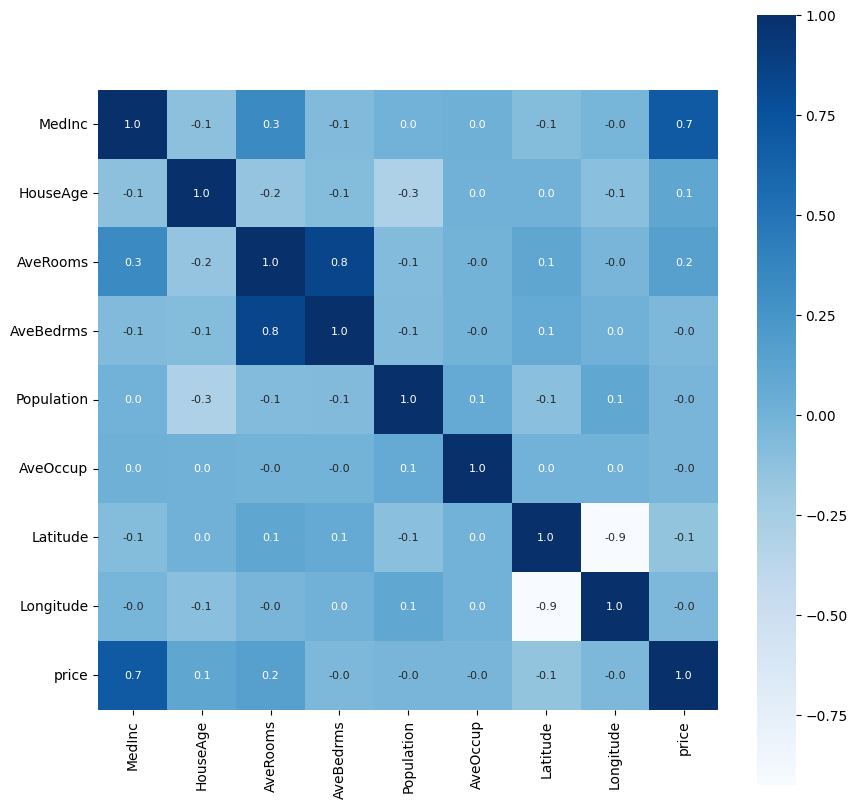

In [24]:
#Constructing the heat map to understand the coorelation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

fmt=float value,annot =featue name and values(annotations),_kws= anoot box size

In [26]:
#Split data into features and label(price/Target)
X=house_price_dataframe.drop(columns='price',axis=1)
Y=house_price_dataframe['price']

In [27]:
print(X)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]


In [28]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64


X has all features col
Y has price col(Target)

Splitting the data into training and test data

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
#0.2 is test data
#0.8 is training data

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor(based on descision tree)

In [33]:
#Loading the model
model=XGBRegressor()

In [35]:
#training the model with Xtrain
model.fit(X_train,Y_train)#fit the model with training data and its corresponding y valye ie target col ie price col or label

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation of model
Here accuracy score cant be used in regression value.Here mean abs error or rsq error is used(Accuracy score is used in classification)

In [36]:
#accuracy for prediction of training data
training_data_prediction=model.predict(X_train)


In [38]:
print(training_data_prediction)#Predicted prices of training data

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [39]:
#comparing predicted prices with y_train values
#R square error
score_1=metrics.r2_score(Y_train,training_data_prediction)#r square


In [41]:
print(score_1)#Very less error means good work by model

0.943650140819218


In [42]:
#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)


In [43]:
print(score_2)

0.1933648700612105


In [46]:
#accuracy for prediction of testing data
testing_data_prediction=model.predict(X_test)


In [47]:
print(testing_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [48]:
#R sq error
score_A=metrics.r2_score(Y_test,testing_data_prediction)


In [49]:
print(score_A)

0.8338000331788725


In [52]:
#Mean absolute error
score_B=metrics.mean_absolute_error(Y_test,testing_data_prediction)

In [53]:
print(score_B)

0.3108631800268186


Since the errors are not much it means the model is working wel on both training and testing data

Visualising actual and predicted prices to see how close model is predicted

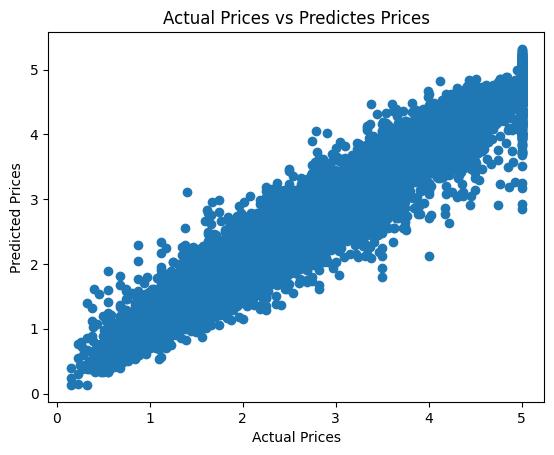

In [54]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predictes Prices")
plt.show()

We see the actual and predicted price are very close to each other ,it means model is good.
